In [5]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


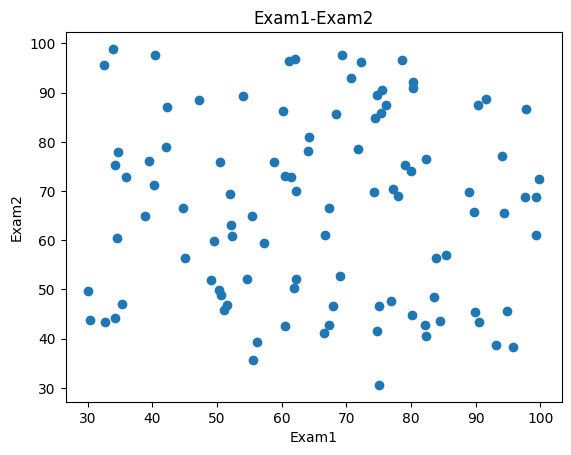

In [9]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [10]:
#add label mask
mask = data.loc[:,'Pass']==1
print(mask)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


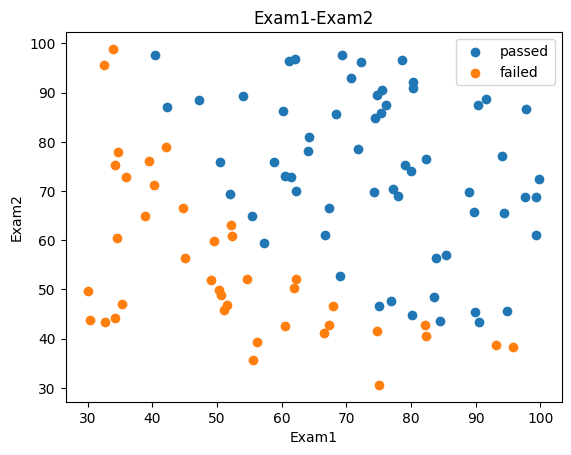

In [13]:
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [14]:
#define X,Y
X = data.drop(['Pass'],axis=1)
Y = data.loc[:,'Pass']
X1 = data.loc[:,'Exam1']
X2 = data.loc[:,'Exam2']

In [16]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [18]:
#establish the model and train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,Y)

LogisticRegression()

In [19]:
#show the predict result and its accuracy
Y_predict = LR.predict(X)
print(Y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,Y_predict)
print(accuracy)

0.89


In [23]:
#exam1=70,exam2=65
Y_test = LR.predict([[70,65]])
print('passed' if Y_test == 1 else 'failed')

passed


C:\Data\Anaconda\envs\MachineLearning\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
LR.coef_
LR.intercept_

array([-25.05219314])

In [26]:
theta0 = LR.intercept_
theta1,theta2 = LR.coef_[0][0],LR.coef_[0][1]

In [28]:
print(theta0,theta1,theta2)

[-25.05219314] 0.20535491217790375 0.20058380395469042


In [29]:
X2_new = -(theta0 + theta1 * X1) / theta2
print(X2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


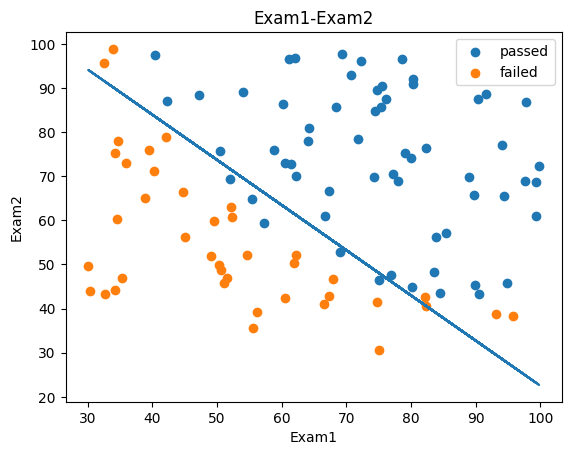

In [31]:
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(X1,X2_new)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [33]:
#create new data
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2

In [34]:
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1         X2         X1_2         X2_2        X1_X2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]


In [35]:
#establish new model and train
LR2 = LogisticRegression()
LR2.fit(X_new,Y)

LogisticRegression()

In [36]:
Y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(Y,Y2_predict)
print(accuracy2)

1.0


In [53]:
X1_new = X1.sort_values()
print(X1,X1_new)

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64 63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64


In [50]:
theta0 = LR2.intercept_
theta1 = LR2.coef_[0][0]
theta2 = LR2.coef_[0][1]
theta3 = LR2.coef_[0][2]
theta4 = LR2.coef_[0][3]
theta5 = LR2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4,theta5)

[-0.06202446] -0.8959428182139837 -1.4002939686975084 -0.000229434572497618 0.003930393115620161 0.03615786759802872


In [54]:
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(X2_new_boundary)

63    132.124249
1     130.914667
57    119.415258
70    118.725082
36    113.258684
         ...    
56     39.275712
47     39.251001
51     38.963585
97     38.955634
75     38.860426
Name: Exam1, Length: 100, dtype: float64


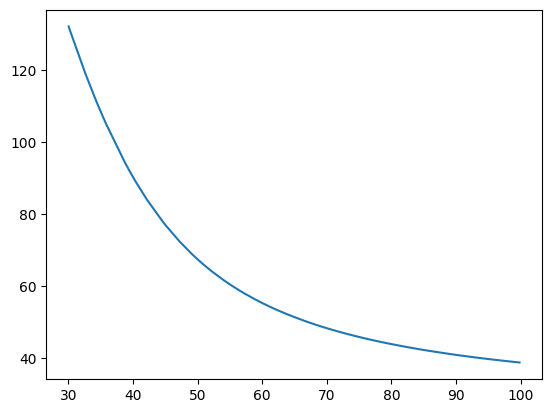

In [55]:
fig4 = plt.figure()
plt.plot(X1_new,X2_new_boundary)
plt.show()

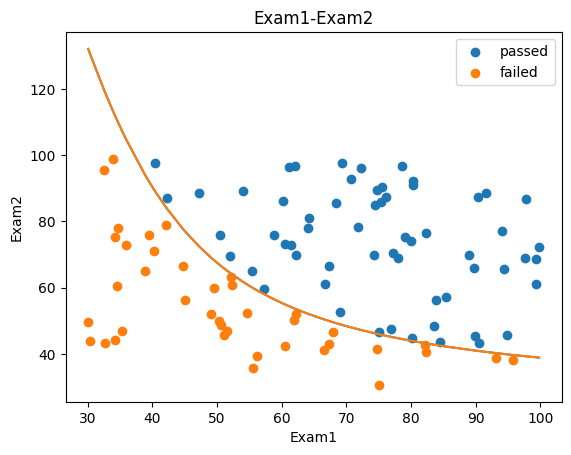

In [56]:
fig5 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.plot(X1_new,X2_new_boundary)
plt.show()

In [57]:
#load data; visualize data; generate new data; establish model and train; predict; accuracy; decision boundary

In [4]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [5]:
#add label musk
mask = data.loc[:,'pass']==1
print(~mask)

0      False
1      False
2      False
3      False
4       True
       ...  
113     True
114     True
115     True
116     True
117     True
Name: pass, Length: 118, dtype: bool


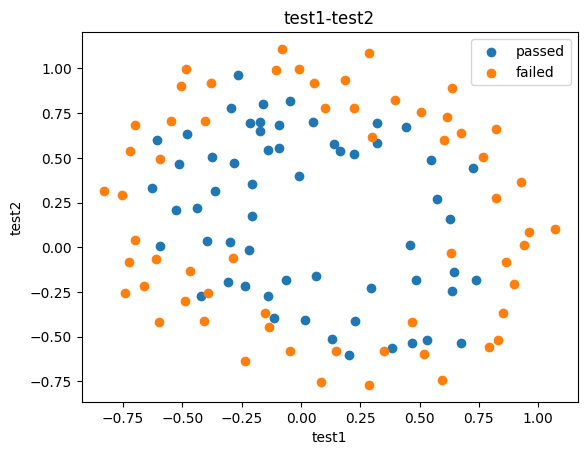

In [6]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [7]:
#define X,Y
X = data.drop(['pass'],axis=1)
Y = data.loc[:,'pass']
X1 = data.loc[:,'test1']
X2 = data.loc[:,'test2']
#create new data
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1        X2      X1_2      X2_2     X1_X2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [8]:
#establish new model and train
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression()
LR2.fit(X_new,Y)

LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score
Y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(Y,Y2_predict)
print(accuracy2)

0.8135593220338984


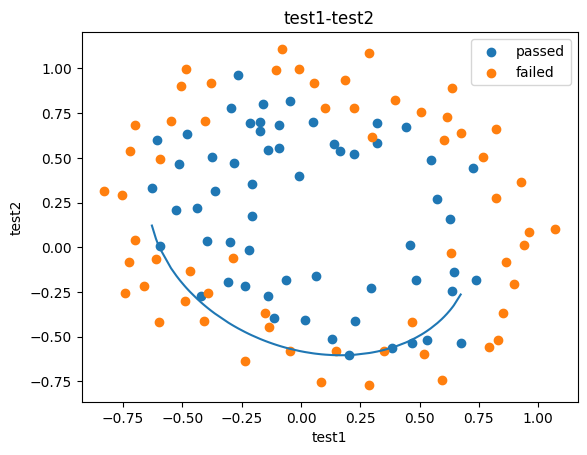

In [13]:
X1_new = X1.sort_values()
theta0 = LR2.intercept_
theta1 = LR2.coef_[0][0]
theta2 = LR2.coef_[0][1]
theta3 = LR2.coef_[0][2]
theta4 = LR2.coef_[0][3]
theta5 = LR2.coef_[0][4]
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))

In [31]:
#define f(X)
def f(X):
    a = theta4
    b = theta5*X+theta2
    c = theta0+theta1*X+theta3*X*X
    X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    return X2_new_boundary1,X2_new_boundary2

In [34]:
X2_new_boundary1 = []
X2_new_boundary2 = []
for X in X1_new:
    X2_new_boundary1.append(f(X)[0])
    X2_new_boundary2.append(f(X)[1])
print(X2_new_boundary1,X2_new_boundary2)

[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([0.1212617]), array([0.04679448]), array([0.02697935]), array([0.00872189]), array([-0.00830576]), array([-0.00830576]), array([-0.11718731]), array([-0.16040224]), array([-0.18016521]), array([-0.18965258]), array([-0.21671004]), array([-0.22530078]), array([-0.23369452]), array([-0.2499261]), array([-0.28761583]), array([-0.30846849]), array([-0.32171919]), array([-0.32816104]), array([-0.33448523]), array([-0.34069505]), array([-0.35278365]), array([-0.35866807]), array([-0.37013014]), array([-0.42186137]), array([-0.42656594]), array([-0.43119936]), array([-0.43574686]), array([-0.44021779]), array([-0.45318277]), array([-0.47336128]), array([-0.47336128]), array([-0.48465118]), array([-0.48828317]), array([-0.49185073]), array([-0.49185073]), array([-0.51193977]), array([-0.51193977]), array([-0.5181489]), array([-0.52412149]), array([-0.52986615]), array([-0.5298

C:\Users\Nido.L\AppData\Local\Temp\ipykernel_17320\149693947.py:6: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
C:\Users\Nido.L\AppData\Local\Temp\ipykernel_17320\149693947.py:7: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)


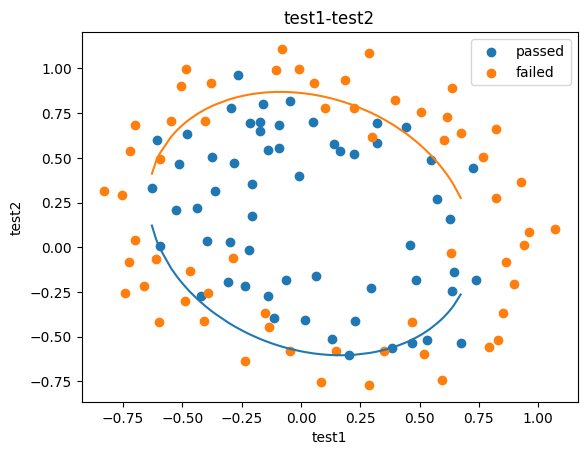

In [35]:
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary1)
plt.plot(X1_new,X2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [42]:
X1_range = [-0.9 + X/10000 for X in range(0,19000)]
X1_range = np.array(X1_range)
X2_new_boundary1 = []
X2_new_boundary2 = []
for X in X1_range:
    X2_new_boundary1.append(f(X)[0])
    X2_new_boundary2.append(f(X)[1])

C:\Users\Nido.L\AppData\Local\Temp\ipykernel_17320\149693947.py:6: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
C:\Users\Nido.L\AppData\Local\Temp\ipykernel_17320\149693947.py:7: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)


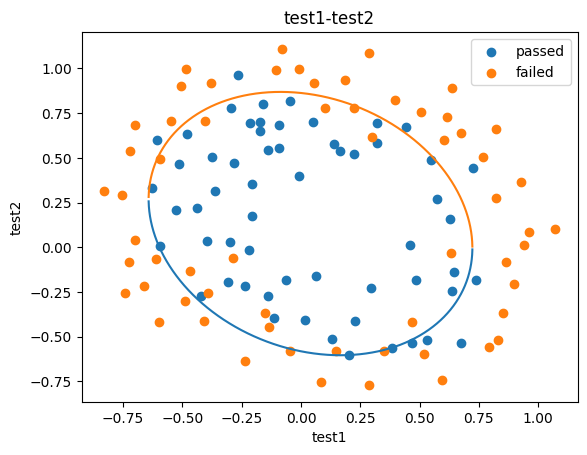

In [43]:
fig4 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_range,X2_new_boundary1)
plt.plot(X1_range,X2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()